In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import wrangle as w
import model as m
import explore as e
from env import get_db_url

In [2]:
raw_data = w.get_telco_data()

In [3]:
raw_data.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [4]:
clean_data = w.prep_telco_data(raw_data)

In [5]:
clean_data.head()

,partner,dependents,phone_service,multiple_lines,internet,online_security,online_backup,device_protection,tech_support,streaming_tv,...,single_house,dual_house,family_house,single_head_house,partner_Yes,dependents_Yes,phone_service_Yes,churn_Yes,ihs,ooss
0,Yes,Yes,Yes,0,1,0,1,0,1,1,...,False,False,True,False,1,1,1,0,3,2
1,No,No,Yes,1,1,0,0,0,0,0,...,True,False,False,False,0,0,1,0,4,0
2,No,No,Yes,0,1,0,0,1,0,0,...,True,False,False,False,0,0,1,1,2,1
3,Yes,No,Yes,0,1,0,1,1,0,1,...,False,True,False,False,1,0,1,1,4,2
4,Yes,No,Yes,0,1,0,0,0,1,1,...,False,True,False,False,1,0,1,1,3,1


In [6]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   partner            7043 non-null   object  
 1   dependents         7043 non-null   object  
 2   phone_service      7043 non-null   object  
 3   multiple_lines     7043 non-null   int64   
 4   internet           7043 non-null   int64   
 5   online_security    7043 non-null   int64   
 6   online_backup      7043 non-null   int64   
 7   device_protection  7043 non-null   int64   
 8   tech_support       7043 non-null   int64   
 9   streaming_tv       7043 non-null   int64   
 10  streaming_movies   7043 non-null   int64   
 11  monthly_charges    7043 non-null   float64 
 12  churn              7043 non-null   object  
 13  charge_bins        7043 non-null   category
 14  single_house       7043 non-null   bool    
 15  dual_house         7043 non-null   bool    
 16  family

In [7]:
train_df, validate_df, test_df = w.split_telco_data(clean_data)

In [8]:
model_ready_data = m.model_dataframe(clean_data)

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.final_split(model_ready_data, "churn")

In [10]:
X_train

,single_house,dual_house,family_house,single_head_house,ooss
3658,False,False,True,False,2
3865,False,False,True,False,0
386,True,False,False,False,2
1204,True,False,False,False,0
4570,False,False,True,False,4
...,...,...,...,...,...
764,True,False,False,False,1
1692,False,False,True,False,0
3353,False,True,False,False,4
1798,False,False,True,False,0


### Over all Churn rate

### Family Groupings

In [11]:

# this answers the question "how does churn `vary among different households?"
# should be four bar charts of "yes/no" one of each house type

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 3658 to 1617
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   partner            3943 non-null   object  
 1   dependents         3943 non-null   object  
 2   phone_service      3943 non-null   object  
 3   multiple_lines     3943 non-null   int64   
 4   internet           3943 non-null   int64   
 5   online_security    3943 non-null   int64   
 6   online_backup      3943 non-null   int64   
 7   device_protection  3943 non-null   int64   
 8   tech_support       3943 non-null   int64   
 9   streaming_tv       3943 non-null   int64   
 10  streaming_movies   3943 non-null   int64   
 11  monthly_charges    3943 non-null   float64 
 12  churn              3943 non-null   object  
 13  charge_bins        3943 non-null   category
 14  single_house       3943 non-null   bool    
 15  dual_house         3943 non-null   bool    
 16  fam

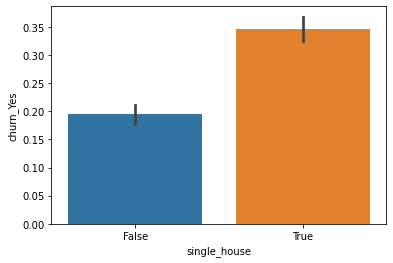

In [13]:
sns.barplot(data = train_df, y = "churn_Yes", x="single_house")
plt.show()

In [14]:
model_ready_data = m.model_dataframe(clean_data)

In [15]:
train_X, validate_X, test_X, train_y, validate_y, test_y = m.final_split(model_ready_data, "churn")

In [16]:
train_X

,single_house,dual_house,family_house,single_head_house,ooss
3658,False,False,True,False,2
3865,False,False,True,False,0
386,True,False,False,False,2
1204,True,False,False,False,0
4570,False,False,True,False,4
...,...,...,...,...,...
764,True,False,False,False,1
1692,False,False,True,False,0
3353,False,True,False,False,4
1798,False,False,True,False,0


In [17]:
train_y

3658     No
3865     No
386      No
1204     No
4570     No
       ... 
764     Yes
1692     No
3353     No
1798    Yes
1617     No
Name: churn, Length: 3943, dtype: object

In [18]:
validate_X

,single_house,dual_house,family_house,single_head_house,ooss
4909,True,False,False,False,1
1506,True,False,False,False,0
6780,True,False,False,False,2
6505,True,False,False,False,0
5332,True,False,False,False,3
...,...,...,...,...,...
6500,True,False,False,False,2
1875,True,False,False,False,0
724,False,False,True,False,0
3968,True,False,False,False,1


In [19]:
validate_y

4909    Yes
1506     No
6780    Yes
6505     No
5332    Yes
       ... 
6500    Yes
1875    Yes
724      No
3968    Yes
6840     No
Name: churn, Length: 1691, dtype: object

In [20]:
test_X

,single_house,dual_house,family_house,single_head_house,ooss
4968,False,True,False,False,2
3143,True,False,False,False,2
6268,False,True,False,False,3
4813,False,False,True,False,0
5894,False,False,True,False,0
...,...,...,...,...,...
3822,False,False,True,False,4
3452,True,False,False,False,0
1839,True,False,False,False,1
1613,False,True,False,False,3


In [21]:
test_y

4968     No
3143    Yes
6268     No
4813    Yes
5894     No
       ... 
3822     No
3452     No
1839     No
1613     No
4833     No
Name: churn, Length: 1409, dtype: object

In [22]:
# Baseline accuracy
clean_data.churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

### Split A

In [23]:
model_ready_data = m.model_dataframe(clean_data)

In [24]:
train_X, validate_X, test_X, train_y, validate_y, test_y = m.final_split(model_ready_data, "churn")

In [25]:
m.decision_tree(train_X, validate_X, train_y, validate_y)

Accuracy of Decision Tree statistical model on training data is 0.7347197565305605
Accuracy of Decision Tree statistical model on validation data is 0.7344766410408042


In [26]:
m.random_forest(train_X, validate_X, train_y, validate_y)

Accuracy of Random Forest statistical model on training data is 0.7347197565305605
Accuracy of Random Forest statistical model on validation data is 0.7344766410408042


In [27]:
m.log_reg(train_X, validate_X, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.7347197565305605
Accuracy of Logistic Regression on validate is 0.7344766410408042


### split B

In [28]:
train_X, validate_X, test_X, train_y, validate_y, test_y = m.model_data(train_df, validate_df, test_df)

In [29]:
train_X

,ooss,single_house,dual_house,single_head_house,family_house
0,2,False,False,False,True
1,0,False,False,False,True
2,2,True,False,False,False
3,0,True,False,False,False
4,4,False,False,False,True
...,...,...,...,...,...
3938,1,True,False,False,False
3939,0,False,False,False,True
3940,4,False,True,False,False
3941,0,False,False,False,True


In [30]:
m.decision_tree(train_X, validate_X, train_y, validate_y )

Accuracy of Decision Tree statistical model on training data is 0.7347197565305605
Accuracy of Decision Tree statistical model on validation data is 0.7344766410408042


In [31]:
m.random_forest(train_X, validate_X, train_y, validate_y)

Accuracy of Random Forest statistical model on training data is 0.7347197565305605
Accuracy of Random Forest statistical model on validation data is 0.7344766410408042


In [32]:
m.log_reg(train_X, validate_X, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.7347197565305605
Accuracy of Logistic Regression on validate is 0.7344766410408042


### Charge Bins Compared to the Number of Out Of Sight Services

### Charge Bins Compared to Churn Rate

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 3658 to 1617
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   partner            3943 non-null   object  
 1   dependents         3943 non-null   object  
 2   phone_service      3943 non-null   object  
 3   multiple_lines     3943 non-null   int64   
 4   internet           3943 non-null   int64   
 5   online_security    3943 non-null   int64   
 6   online_backup      3943 non-null   int64   
 7   device_protection  3943 non-null   int64   
 8   tech_support       3943 non-null   int64   
 9   streaming_tv       3943 non-null   int64   
 10  streaming_movies   3943 non-null   int64   
 11  monthly_charges    3943 non-null   float64 
 12  churn              3943 non-null   object  
 13  charge_bins        3943 non-null   category
 14  single_house       3943 non-null   bool    
 15  dual_house         3943 non-null   bool    
 16  fam

### T-tests

In [34]:
single_df = e.single_house(train_df)

### Chi Squared tests